<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: [*yongqi li*]
### ***CID***: [*02261717*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [ ]:
%matplotlib inline
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms 
from torchvision import datasets
from torch.utils.data import DataLoader,Subset
import numpy as np
from torch.autograd import Variable
torch.set_printoptions(edgeitems=2,linewidth=75)
torch.manual_seed(123)
device = torch.device("cuda")

<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

In [ ]:
# download imgs from FashionMNIST
path = 'data'
Fashion_Mnist = datasets.FashionMNIST(path,train=True,download=True)

In [ ]:
batch_size = 64
learning_rate = 1e-3
max_epoch = 30
transformer =transforms.Compose([transforms.ToTensor()])


train_dataset = datasets.FashionMNIST(root=path, train=True, transform=transformer, download=False)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size,drop_last=True)

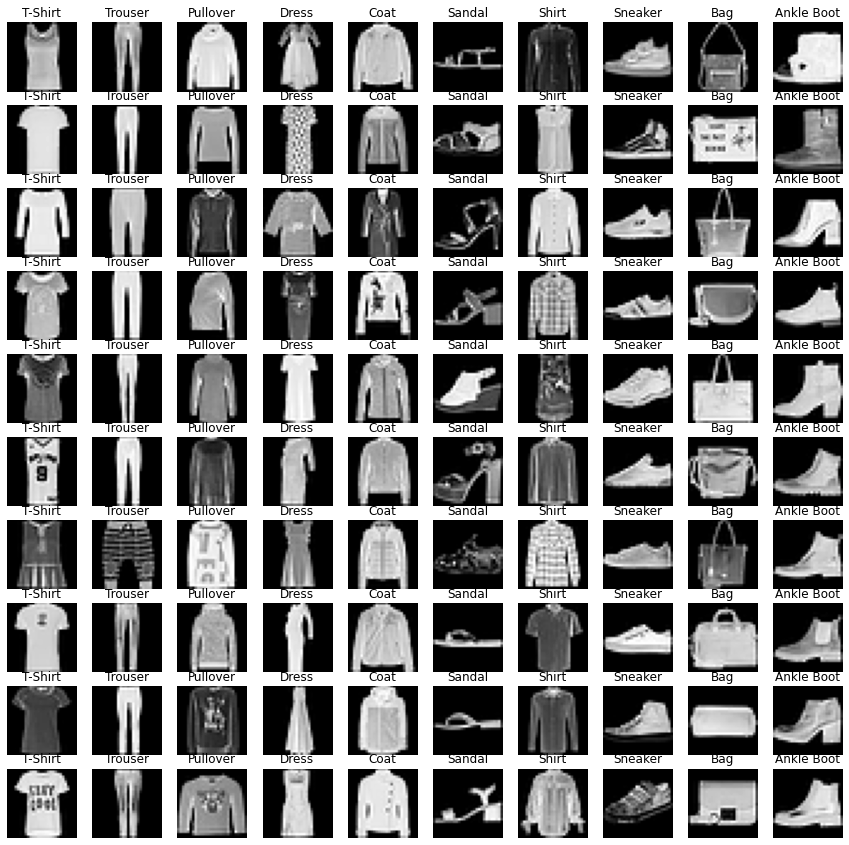

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(15, 15))
cols, rows = 10, 10
k = 1000
for i in range(cols * rows):
    sample_idx = i%10
    indices = list(range(k, k+100))
    img = next(img for img, label in Subset(train_dataset,indices) if label == sample_idx)
    figure.add_subplot(rows, cols, i+1)
    plt.title(labels_map[i%10])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    k += 100
plt.show()

### Load data
- Read the FashionMNIST data
- ToTensor and Resize(32*32 for the convenience of conv)
- Shuffle trainloader
- Adapt mini_batch

Image shape:torch.Size([1, 28, 28])
Num of pixels:784


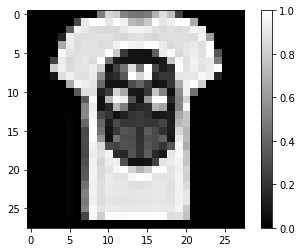

In [ ]:
images, labels = next(iter(train_loader)) 

print(f'Image shape:{str(images.shape[1:])}')   

plt.imshow(images[0].squeeze(),cmap="gray")  
plt.colorbar()

print(f'Num of pixels:{str(images.shape[2]*images.shape[3])}')  


In [ ]:
from collections import Counter
train_classes = [label for _, label in train_dataset]
class_num = Counter(train_classes)

In [ ]:
import pandas as pd
class_num = dict(class_num)
class_num

{9: 6000,
 0: 6000,
 3: 6000,
 2: 6000,
 7: 6000,
 5: 6000,
 1: 6000,
 6: 6000,
 4: 6000,
 8: 6000}

We can see all the classes are balanced, wow!

<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



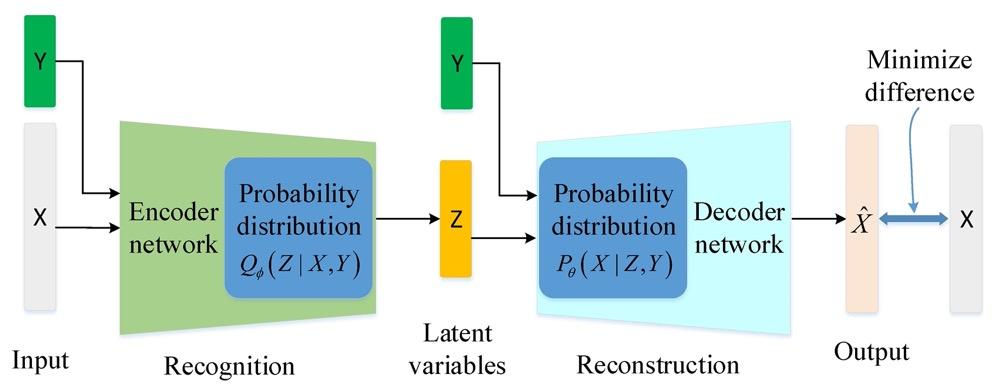

### Encoder part 
**Implemented**
- Convolutional layers
- Different activations
- Data augmentation using Normalization

In the scenario of CVAE,we will process the input data(img) into the encoder, by combining the data(img) its label (label) together (cat).
The model is made up with FCN and Conv. The Conv module consists of **convolution**, **BN**,**maxpool** and **ReLU** like activation functions. Finally ,**fully connected layers** are used to generate the **mean** and **variance** of the gaussian distribution respectively. 

Note that when switching between convolution layer and FCN layers , the shape of the image will change from a **vector** to  **[prev_channels, img_length, img_length]**. In order to correctly handle the input features  we will do  flatten and unflattenoperations. 

<br>

---

<br>

In [ ]:
class VAE_Encoder(nn.Module):
    def __init__(self):
        super(VAE_Encoder, self).__init__()
        self.ec1 = nn.Sequential(     # defining own Enocoder layers(ec for short)
            nn.Linear(28*28+10, 512), # Adding class
            nn.BatchNorm1d(512),
            nn.ReLU()
            )
        
        self.ec2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2) # Trying some different activation fcns
            )
        self.ec3 = nn.Sequential(
            nn.Conv2d(1,4,3,1,1), #(batch_size,1,16,16)->(batch_size,4,8,8)
            nn.BatchNorm2d(4),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2)
        )

    def forward(self, x, c): 
        x = torch.flatten(x,1) # flatten the img into a vector  
        x = torch.cat([x, c], 1) # 28*28+10
        x = self.ec1(x) # 28*28+10 -> 512
        x = self.ec2(x) # 512 ->256
        x = x.reshape(batch_size,1,16,16) # 256 => 1*16*16
        x = self.ec3(x) 
        x = torch.flatten(x,1) # =>(batch_size,4*8*8)
        return x


### Decoder part 
**Implemented**
- Convolutional layers
- Different activations (ReLU family and Sigmoid)
- Data augmentation using Normalization

In the decoder part we will receive samples generated from latent space and attach labels to the samples.

When we want to generate data according to the label, we can get sample from the normal distribution, then cat the label of the data you want to generate, and send it to the Decoder together to generate data similar to the label.We will talk about sample(repara) in the next section.

In [ ]:
class VAE_Decoder(nn.Module):
    def __init__(self):
        super(VAE_Decoder, self).__init__()
        self.dc1 = nn.Sequential(
            nn.Linear(128 + 10, 4*8*8),# Conditioning class
            nn.Sigmoid()
            ) 
        self.dc2 = nn.Sequential(
            nn.ConvTranspose2d(4,1,3,1,1),# Conditioning class
            nn.BatchNorm2d(1),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2, mode='nearest')
            ) 
        self.dc3 = nn.Sequential(
            nn.Linear(16*16, 512),
            nn.LeakyReLU(0.2)
        )
        self.dc4 = nn.Sequential(
            nn.Linear(512, 784),
            nn.ReLU()
        )
    def unFlatten(self, x):
        return x.reshape((x.shape[0], 4, 8, 8)) # define unflatten fcn to reshape
    def forward(self, z, c):
        z = torch.cat([z, c], 1)
        z = self.dc1 (z) # =>latent_size+10=>4*8*8(ready for ConvTranspose)
        z = self.unFlatten(z) # 64 4channel 8*8 feature maps
        z = self.dc2(z) # 4*8*8 => 1*16*16
        z = z.reshape(batch_size,1*16*16) # Flatten process
        z = self.dc3(z) # 16*16=>512
        z = self.dc4(z) # 512=>784=28*28
        return z.reshape((-1,1,28,28)) # Reshape the vector into an image


### CVAE class and Training
During training, numbers (label information) are provided to the encoder and decoder. In this case it will be represented as a one-hot vector. To generate an image of a particular cloth, simply feed that cloth img label into the decoder along with a random point in the latent space sampled from a standard normal distribution. 

In [ ]:
class CVAE(nn.Module): # The combination of decode and encode
    def __init__(self ):
        super(CVAE, self).__init__()
        self.encoder = VAE_Encoder()
        self.decoder = VAE_Decoder()

        self.Mu = nn.Linear(4*8*8, 128) 
        self.Sig = nn.Linear(4*8*8, 128) 
        self.distribution = torch.distributions.Normal(0, 1) # Sample from N(0,1)
        self.activation = nn.ReLU()


    def latent_space(self, x):
        mu = self.Mu(x) 
        sigma = torch.exp(self.Sig(x)) 
        z = mu + sigma * self.distribution.sample(mu.shape).to(device) 
        kl_div = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z, kl_div

    def forward(self, x, c):
      x = self.encoder(x, c)
      z, kl_div = self.latent_space(x)
      return self.decoder(z, c), kl_div #get fake img and kl_divergence

In [ ]:
train_loss_list = []
def train(autoencoder, data, kl_div_on=True, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(1,epochs+1):
        total_loss = 0.
        for batch_idx,(x,y) in enumerate(data):
            x = x.to(device)
            y = torch.nn.functional.one_hot(y, 10).to(device)
            opt.zero_grad() # Set the initial grad
            x_hat, KL = autoencoder(x, y) # produce fake img and kl_d
            loss = ((x - x_hat)**2).sum() + KL # Calculate total loss
            loss.backward()
            opt.step()
            total_loss += loss.item()
        total_loss = total_loss/len(train_loader.dataset)
        train_loss_list.append(total_loss)
        print(f'Epoch:{epoch},train loss:{train_loss_list[epoch-1]}')
    return autoencoder # Return the trained autoencoder

In [ ]:
CVAE = CVAE().to(device)
CVAE = train(CVAE, train_loader)

Epoch:1,train loss:82.53699139811198
Epoch:2,train loss:72.38008252766927
Epoch:3,train loss:70.42571826985677
Epoch:4,train loss:69.73951717936198
Epoch:5,train loss:69.31641494954427
Epoch:6,train loss:68.8094608235677
Epoch:7,train loss:68.52308844807942
Epoch:8,train loss:68.33442815755208
Epoch:9,train loss:68.12552644042968
Epoch:10,train loss:67.76375182291666
Epoch:11,train loss:67.58059007161458
Epoch:12,train loss:67.3907149210612
Epoch:13,train loss:67.33414168701172
Epoch:14,train loss:67.21217709554037
Epoch:15,train loss:67.09143787027995
Epoch:16,train loss:67.031437504069
Epoch:17,train loss:66.96119858398437
Epoch:18,train loss:66.88573302815755
Epoch:19,train loss:66.81102221272786
Epoch:20,train loss:66.78412342529298


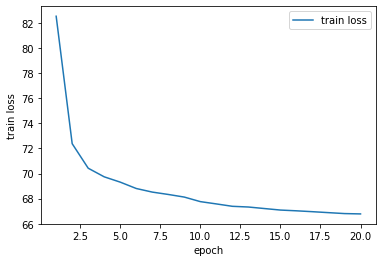

In [ ]:
epoches = np.linspace(1,20,20)
plt.plot(epoches,train_loss_list,'-',label='train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.show()

### Hyperpara 
We also consider tuning some hyperpara when training the model. 
- learning rate: If the learning rate is too small, the convergence will be slow. If the learning rate is too large, the loss will fluctuate or even become larger. In this case We find that we can increase the lr>1e-3 to make the traing process faster while also keep the loss to decrease and converge.
- batch size: Adpting mini_batch to go through the system more quickly and with less variability, which fosters faster learning.
- epoch: The neural network gradually changes from the non-fitting state to the optimal fitting state, and then the over-fitting state. Therefore, epoch is not as big as possible, generally between 50 and 200. The more the data, the larger the corresponding epoch. In this case we find that the train loss will converge at around epoch=15. So we think set epoch = 15+-5 will be good. 

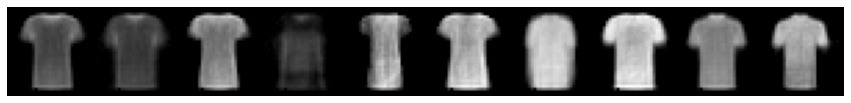

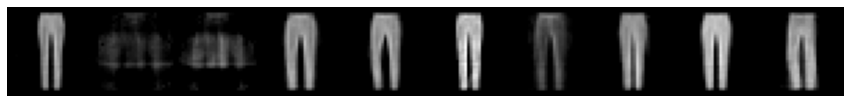

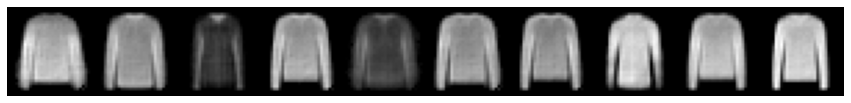

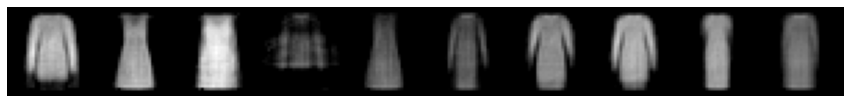

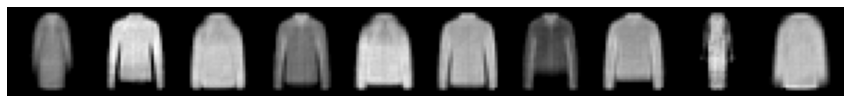

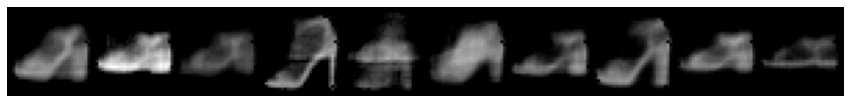

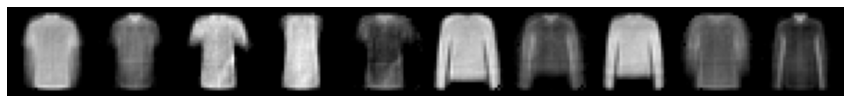

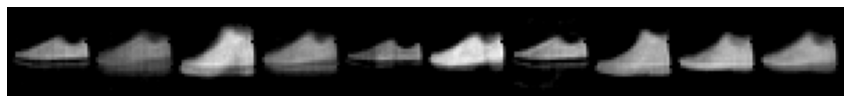

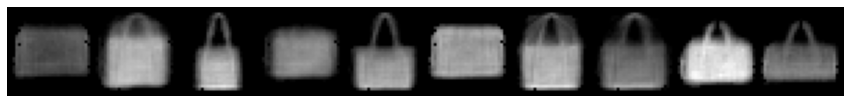

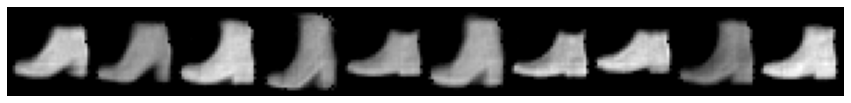

In [ ]:
from torchvision.utils import make_grid

with torch.no_grad():
    num_imgs = 64 
    image = []
    class_list = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    for i in range(10):
        class_name = class_list[i] # Each class will be a input and switch to next class in the iteration 

        label = torch.nn.functional.one_hot(torch.ones(64, dtype = torch.long) * i, 10).cuda()
        z = torch.randn(batch_size, 128).to(device)
        z = (CVAE.decoder(z, label).cpu())
        grid = make_grid(z[:10], nrow=10, normalize=True).permute(1,2,0).numpy()
        fig, ax = plt.subplots(figsize=(15,15))
        ax.imshow(grid)
        plt.axis("off")

plt.show()# Finally we will produce 10 imgs for each class.

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

In [435]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.autograd import Variable
from torchvision.utils import make_grid

In [436]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
])

batch_size = 256
data_loader = torch.utils.data.DataLoader(FashionMNIST('data', train=True, download=False_, transform=transform),
                                          batch_size=batch_size, shuffle=True)

In [437]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(28*28+10, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 16*16),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(16*16, 1), # fcn
            nn.Sigmoid()
        )
    
    def forward(self, x, labels):
        x = x.view(x.size(0), 784)
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        out = self.model(x)
        return out.squeeze()

In [438]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(100+10, 16*16), #adding conditions 
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(16*16, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 28*28),
            nn.Tanh() # fcn
        )
    
    def forward(self, z, labels):
        z = z.view(z.size(0), 100)
        c = self.label_emb(labels)
        x = torch.cat([z, c], 1)
        out = self.model(x)
        return out.view(x.size(0), 28, 28)  #produce imgs 


In [439]:
generator = Generator().cuda()
discriminator = Discriminator().cuda() # build model

In [440]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-3)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-3)


In [441]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).cuda())
    g_loss.backward()
    g_optimizer.step()
    return g_loss.item()

In [442]:
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train discriminator on real data
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).cuda())
    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    # train with fake images
    z = Variable(torch.randn(batch_size, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).cuda())
    
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.item()

In [453]:
num_epochs = 10
n_critic = 5

for epoch in range(1,num_epochs+1):
    
    for batch_idx, (images, labels) in enumerate(data_loader):
        
        real_images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        generator.train()
        
        d_loss = 0
        for _ in range(n_critic):
            d_loss = discriminator_train_step(len(real_images), discriminator,
                                              generator, d_optimizer, criterion,
                                              real_images, labels)
        

        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)
    print(f'epoch:{epoch},g loss:{g_loss},d loss{d_loss}')

epoch:1,g loss:7.903107643127441,d loss0.05240198224782944
epoch:2,g loss:6.969298362731934,d loss0.11508049070835114
epoch:3,g loss:6.235345840454102,d loss0.1445736587047577
epoch:4,g loss:5.428343772888184,d loss0.23983144760131836
epoch:5,g loss:5.399477005004883,d loss0.17384150624275208
epoch:6,g loss:5.58685827255249,d loss0.24784094095230103
epoch:7,g loss:6.419020652770996,d loss0.3213067650794983
epoch:8,g loss:5.624552249908447,d loss0.1739206314086914
epoch:9,g loss:4.6475019454956055,d loss0.25216957926750183
epoch:10,g loss:4.316556930541992,d loss0.29748743772506714


In [ ]:
#We can see the trend for the loss are as expected 

In [454]:
z = Variable(torch.randn(100, 100)).cuda()
labels = torch.LongTensor([i for i in range(10) for _ in range(10)]).cuda()

In [455]:
images = generator(z, labels).unsqueeze(1)
grid = make_grid(images, nrow=10, normalize=True)

(-0.5, 301.5, 301.5, -0.5)

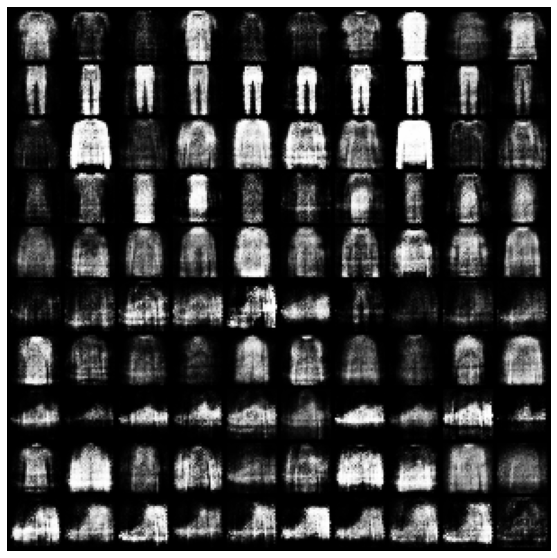

In [456]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(grid.permute(1, 2, 0).data.cpu(), cmap='binary')
ax.axis('off')

In [457]:
def generate_digit(generator, digit):
    z = Variable(torch.randn(1, 100)).cuda()
    label = torch.LongTensor([digit]).cuda()
    img = generator(z, label).data.cpu()
    img = 0.5 * img + 0.5
    return transforms.ToPILImage()(img)

In [458]:
generate_digit(generator, 7)

### Hyperpara 
In the scenario of cGAN，we consider tuning some hyperpara when training the model. 
- number of hidden layers: In this question we find that if the number of HL will greatly influence the efficiency of the network.
- pretrianed weight/weight initialize: Doing some work on improving the initial weights will also improve the efficiency and performance of the model
- optimizer: We can also try to adjust the para in the opts to improve the model by reaching the minimum of the loss fn quicker


<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the three networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

VAEs training is based only on the evidence lower bound (ELBO), Additionally, the loss used in VAE often are a bit limited in how they measure good network performance.

GANs generally produce better photo-realistic images but can be difficult to work with. Conversely, VAEs are easier to train but don’t usually give the best results.

In this task, according to the loss figure and data ,I recommend picking VAEs if you don’t have a lot of time to experiment with GANs and photorealism isn’t paramount.

<br>

---

<br>

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

In this question in order to save time we choose VAE on the imbalanced dataset.